In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

#transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#CNN model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#instantiate the model
net = Net()

#define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



#train the network with visualization
train_losses = []
train_accuracy = []
for epoch in range(10):

    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        #get the inputs
        inputs, labels = data

        #zero the parameter gradients
        optimizer.zero_grad()

        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #accumulate loss
        running_loss += loss.item()

        #accumulate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #print statistics
        if i % 2000 == 1999:
            train_loss = running_loss / 2000
            train_acc = 100 * correct / total
            print(f'Epoch [{epoch + 1}, {i + 1}] - Loss: {train_loss:.3f}, Accuracy: {train_acc:.2f}%')
            train_losses.append(train_loss)
            train_accuracy.append(train_acc)
            running_loss = 0.0
            correct = 0
            total = 0

100%|██████████| 170498071/170498071 [00:05<00:00, 31401744.05it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1, 2000] - Loss: 2.216, Accuracy: 16.69%
Epoch [1, 4000] - Loss: 1.849, Accuracy: 31.26%
Epoch [1, 6000] - Loss: 1.686, Accuracy: 37.09%
Epoch [1, 8000] - Loss: 1.597, Accuracy: 41.58%
Epoch [1, 10000] - Loss: 1.536, Accuracy: 43.75%
Epoch [1, 12000] - Loss: 1.450, Accuracy: 47.39%
Epoch [2, 2000] - Loss: 1.380, Accuracy: 49.98%
Epoch [2, 4000] - Loss: 1.352, Accuracy: 51.09%
Epoch [2, 6000] - Loss: 1.349, Accuracy: 52.27%
Epoch [2, 8000] - Loss: 1.322, Accuracy: 52.70%
Epoch [2, 10000] - Loss: 1.280, Accuracy: 54.80%
Epoch [2, 12000] - Loss: 1.273, Accuracy: 54.59%
Epoch [3, 2000] - Loss: 1.211, Accuracy: 56.88%
Epoch [3, 4000] - Loss: 1.183, Accuracy: 58.39%
Epoch [3, 6000] - Loss: 1.196, Accuracy: 57.81%
Epoch [3, 8000] - Loss: 1.178, Accuracy: 57.66%
Epoch [3, 10000] - Loss: 1.165, Accuracy: 58.73%
Epoch [3, 12000] - Loss: 1.166, Accuracy: 58.90%
Epoch [4, 2000] - Loss: 1.104, Accuracy: 

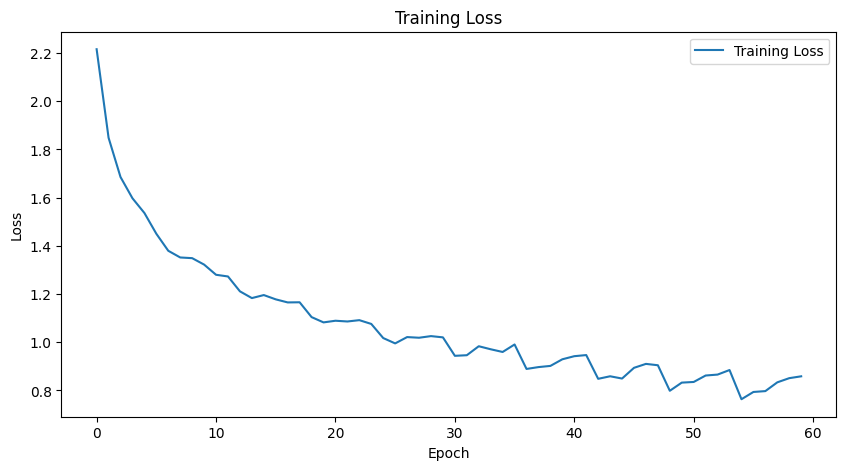

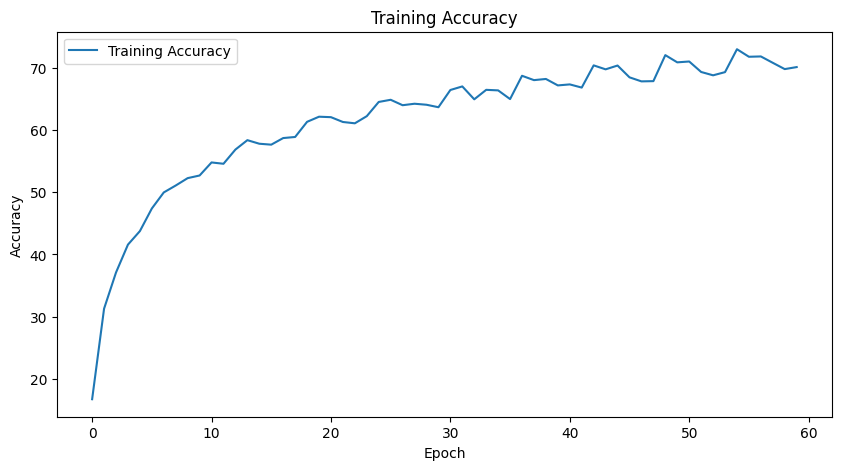

In [2]:
#function to plot training loss
def plot_loss(train_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

#function to plot training accuracy
def plot_accuracy(train_accuracy):
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()

#function to visualize model predictions
def visualize_predictions(model, testloader, classes, num_images=5):
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
        plt.title(f'Predicted: {classes[predicted[i]]}\nActual: {classes[labels[i]]}')
        plt.axis('off')
    plt.show()


#plot training loss and accuracy
plot_loss(train_losses)
plot_accuracy(train_accuracy)


The downward trend in the training loss graph indicates that the model is effectively minimizing its errors over time as it undergoes training epochs.This downward trend signifies that the CNN is progressively improving its ability to make more accurate predictions on the training data.


Similarly, the upward trend in the training accuracy graph indicates that the CNN is becoming increasingly proficient at correctly classifying examples from the training dataset. The increasing trend in training accuracy implies that the CNN is effectively learning to recognize patterns and features in the training data that are indicative of different classes, thereby achieving higher classification accuracy.


Predicted:    cat  ship   car plane


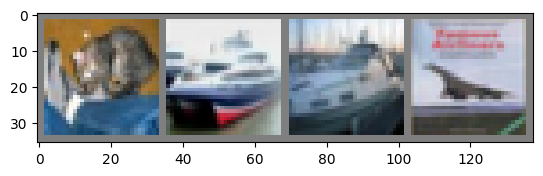

GroundTruth:    cat  ship  ship plane


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def visualize_predictions(model, testloader, classes, num_images=5):
    model.eval()  #set model to evaluation mode

    #get a batch of test data
    dataiter = iter(testloader)
    images, labels = next(dataiter)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    #print predicted classes
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(min(num_images, len(images)))))
    #visualize images
    imshow(torchvision.utils.make_grid(images[:min(num_images, len(images))]))
    #print ground truth labels
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]]
                                    for j in range(min(num_images, len(images)))))


#visualize predictions
visualize_predictions(net, testloader, classes)